In [21]:
import os
from pathlib import Path

SEQ_LEN = 40
STEP = 3

PATH_TXT = Path("/home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/data/fleurs_mal.txt")

if not PATH_TXT.exists():
    candidate = Path("data/fleurs_mal.txt")
    if candidate.exists():
        PATH_TXT = candidate
    else:
        candidate2 = Path("../data/fleurs_mal.txt")
        if candidate2.exists():
            PATH_TXT = candidate2

assert PATH_TXT.exists(), f"Fichier introuvable. Chemins testés: {PATH_TXT}, data/fleurs_mal.txt, ../data/fleurs_mal.txt"

print("✅ OK fichier:", PATH_TXT.resolve())


✅ OK fichier: /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/data/fleurs_mal.txt


In [22]:
import numpy as np

bStart = False
with open(PATH_TXT, "r", encoding="utf8") as fin:
    lines = fin.readlines()

lines2 = []

for line in lines:
    line = line.strip().lower()  # enlever espaces + majuscules

    # Début du texte utile
    if ("charles baudelaire avait un ami".lower() in line) and (bStart is False):
        print("START")
        bStart = True

    # Fin du texte utile
    if "end of the project gutenberg ebook of les fleurs du mal, by charles baudelaire".lower() in line:
        print("END")
        break

    # ignorer avant START ou lignes vides
    if (bStart is False) or (len(line) == 0):
        continue

    lines2.append(line)

text = " ".join(lines2)

chars = sorted(set(text))      # alphabet (caractères uniques)
nb_chars = len(chars)          # taille de l'alphabet

print("Longueur texte:", len(text))
print("nb_chars:", nb_chars)
print("Extrait chars:", chars[:50])


START
END
Longueur texte: 146176
nb_chars: 60
Extrait chars: [' ', '!', "'", '(', ')', ',', '-', '.', '0', '1', '2', '5', '6', '7', '8', ':', ';', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '«', '»', 'à', 'â', 'ç']


In [23]:
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}

print("Index de 'a':", char2idx.get('a', None))
print("Caractère 0:", idx2char[0])


Index de 'a': 19
Caractère 0:  


In [24]:
SEQ_LEN = 40
STEP = 3  # stride

sentences = []
next_chars = []

for i in range(0, len(text) - SEQ_LEN, STEP):
    sentences.append(text[i:i+SEQ_LEN])
    next_chars.append(text[i+SEQ_LEN])

print("Nb séquences:", len(sentences))
print("Exemple X:", sentences[0])
print("Exemple y:", next_chars[0])


Nb séquences: 48712
Exemple X: charles baudelaire avait un ami, auguste
Exemple y:  


In [25]:
print("X:", repr(sentences[0]))
print("y:", repr(next_chars[0]))
print("ASCII code:", ord(next_chars[0]))


X: 'charles baudelaire avait un ami, auguste'
y: ' '
ASCII code: 32


In [26]:
print("nb_chars =", nb_chars)
print("chars[:50] =", chars[:50])
print("chars[-50:] =", chars[-50:])


nb_chars = 60
chars[:50] = [' ', '!', "'", '(', ')', ',', '-', '.', '0', '1', '2', '5', '6', '7', '8', ':', ';', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '«', '»', 'à', 'â', 'ç']
chars[-50:] = ['2', '5', '6', '7', '8', ':', ';', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '«', '»', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'ù', 'û', 'ü']


In [27]:
print("Longueur du texte =", len(text))
print("Extrait =", repr(text[:200]))


Longueur du texte = 146176
Extrait = "charles baudelaire avait un ami, auguste poulet-malassis, ancien élève de l'école des chartes, qui s'était fait éditeur par goût pour les raffinements typographiques et pour la littérature qu'il jugea"


In [28]:
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

print("nb_chars =", nb_chars)
print("index de 'a' =", char2index.get('a', None))



nb_chars = 60
index de 'a' = 19


In [29]:
SEQLEN = 10
STEP = 1

input_chars = []
label_chars = []

for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i+SEQLEN])   # séquence de longueur SEQLEN
    label_chars.append(text[i+SEQLEN])     # le caractère suivant

print("nbex =", len(input_chars))
print("Exemple X:", input_chars[0])
print("Exemple y:", label_chars[0])


nbex = 146166
Exemple X: charles ba
Exemple y: u


In [30]:
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=bool)
y = np.zeros((len(input_chars), nb_chars), dtype=bool)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (146166, 10, 60)
y shape: (146166, 60)


In [31]:
for i, seq in enumerate(input_chars):
    for j, ch in enumerate(seq):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1


In [32]:
i = 0
decoded_seq = "".join(index2char[np.argmax(X[i, j, :])] for j in range(SEQLEN))
decoded_label = index2char[np.argmax(y[i, :])]

print("decoded X:", decoded_seq)
print("decoded y:", decoded_label)
print("original X:", input_chars[i])
print("original y:", label_chars[i])


decoded X: charles ba
decoded y: u
original X: charles ba
original y: u


In [33]:
ratio_train = 0.8
nb_train = int(round(len(input_chars) * ratio_train))

X_train = X[:nb_train]
y_train = y[:nb_train]

X_test  = X[nb_train:]
y_test  = y[nb_train:]

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)


X_train: (116933, 10, 60) y_train: (116933, 60)
X_test : (29233, 10, 60) y_test : (29233, 60)


In [34]:
import _pickle as pickle

outfile = f"Baudelaire_len_{SEQLEN}.p"
with open(outfile, "wb") as f:
    pickle.dump([index2char, X_train, y_train, X_test, y_test], f)

print("✅ saved:", outfile)


✅ saved: Baudelaire_len_10.p


In [37]:
import _pickle as pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Activation
from tensorflow.keras.optimizers import RMSprop



2026-02-05 12:50:16.210968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
SEQLEN = 10
outfile = f"Baudelaire_len_{SEQLEN}.p"

index2char, X_train, y_train, X_test, y_test = pickle.load(open(outfile, "rb"))

nb_chars = len(index2char)  # IMPORTANT: récupère nb_chars depuis le dict chargé
print("nb_chars =", nb_chars)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)


nb_chars = 60
X_train: (116933, 10, 60) y_train: (116933, 60)
X_test : (29233, 10, 60) y_test : (29233, 60)


In [38]:
HSIZE = 128

model = Sequential(name="rnn_baudelaire")
model.add(SimpleRNN(
    HSIZE,
    return_sequences=False,
    input_shape=(SEQLEN, nb_chars),
    unroll=True
))


2026-02-05 12:51:01.504671: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2026-02-05 12:51:01.504719: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2026-02-05 12:51:01.504736: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: ubuntu-IdeaPad-L340-15IRH-Gaming
2026-02-05 12:51:01.504749: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: ubuntu-IdeaPad-L340-15IRH-Gaming
2026-02-05 12:51:01.504875: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 570.133.7
2026-02-05 12:51:01.504924: I external/local_xla/xla/stream_executor/

In [39]:
model.add(Dense(nb_chars, name="fc_out"))
model.add(Activation("softmax", name="softmax"))


In [40]:
BATCH_SIZE = 128
NUM_EPOCHS = 50
learning_rate = 0.001

opt = RMSprop(learning_rate=learning_rate)

model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "rnn_baudelaire"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        24,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_out (Dense)                  │ (None, 60)             │         7,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 60)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,932 (124.73 KB)

 Trainable params: 31,932 (124.73 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2956 - loss: 2.4620 - val_accuracy: 0.3427 - val_loss: 2.2195
Epoch 2/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3496 - loss: 2.1753 - val_accuracy: 0.3524 - val_loss: 2.1517
Epoch 3/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3647 - loss: 2.1034 - val_accuracy: 0.3735 - val_loss: 2.0965
Epoch 4/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3788 - loss: 2.0487 - val_accuracy: 0.3858 - val_loss: 2.0450
Epoch 5/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3955 - loss: 2.0016 - val_accuracy: 0.3967 - val_loss: 2.0010
Epoch 6/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4063 - loss: 1.9591 - val_accuracy: 0.4030 - val_loss: 1.9793
Epoch 7/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4162 - loss: 1.9222 - val_accuracy: 0.4154 - val_loss: 1.9583
Epoch 8/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4253 - loss: 1.8893 - val_accuracy: 0.

In [42]:
scores_train = model.evaluate(X_train, y_train, verbose=1)
scores_test  = model.evaluate(X_test,  y_test,  verbose=1)

print("PERFS TRAIN: %s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print("PERFS TEST:  %s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))


3655/3655 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5399 - loss: 1.4799
914/914 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4636 - loss: 1.8145
PERFS TRAIN: compile_metrics: 53.99%
PERFS TEST:  compile_metrics: 46.36%


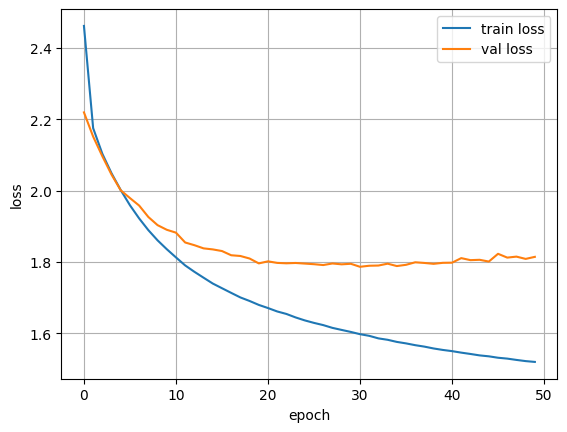

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.grid(True); plt.legend()
plt.show()


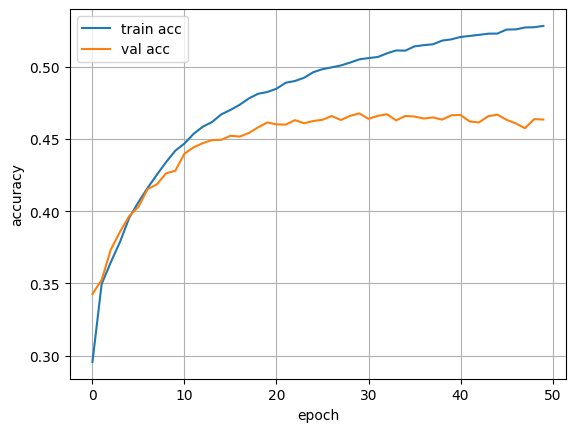

In [44]:
plt.figure()
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.grid(True); plt.legend()
plt.show()


In [50]:
import os

MODEL_DIR = "/home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/models"
os.makedirs(MODEL_DIR, exist_ok=True)

json_path = os.path.join(MODEL_DIR, "rnn_baudelaire.json")
weights_path = os.path.join(MODEL_DIR, "rnn_baudelaire.weights.h5")

with open(json_path, "w", encoding="utf-8") as f:
    f.write(model.to_json())

model.save_weights(weights_path)

print("✅ saved:", json_path)
print("✅ saved:", weights_path)


✅ saved: /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/models/rnn_baudelaire.json
✅ saved: /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/models/rnn_baudelaire.weights.h5


In [51]:
char2index = {c: i for i, c in index2char.items()}


In [52]:
def decode_sequence(x_seq, index2char):
    # x_seq: (SEQLEN, nb_chars)
    idxs = np.argmax(x_seq, axis=1)
    return "".join(index2char[i] for i in idxs)


In [55]:
query = "la mort de"
assert len(query) == SEQLEN, f"Ta requête doit faire exactement {SEQLEN} caractères."

matches = []
for i in range(len(X_train)):
    s = decode_sequence(X_train[i], index2char)
    if s == query:
        y_idx = np.argmax(y_train[i])
        matches.append(index2char[y_idx])

print("Nb occurrences:", len(matches))
print("Labels cibles observés (caractère suivant):", matches[:50])
print("Répartition:", {c: matches.count(c) for c in sorted(set(matches))})


Nb occurrences: 2
Labels cibles observés (caractère suivant): [' ', ' ']
Répartition: {' ': 2}


In [56]:
SEQLEN = 10
outfile = f"Baudelaire_len_{SEQLEN}.p"

with open(outfile, "rb") as f:
    index2char, X_train, y_train, X_test, y_test = pickle.load(f)

nb_chars = len(index2char)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)
print("nb_chars:", nb_chars)


X_train: (116933, 10, 60) y_train: (116933, 60)
X_test : (29233, 10, 60) y_test : (29233, 60)
nb_chars: 60


In [59]:
MODEL_DIR = "/home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/models"

MODEL_JSON = os.path.join(MODEL_DIR, "rnn_baudelaire.json")
MODEL_W    = os.path.join(MODEL_DIR, "rnn_baudelaire.weights.h5")

print(MODEL_JSON)
print(MODEL_W)
print("exists json?", os.path.exists(MODEL_JSON))
print("exists w?   ", os.path.exists(MODEL_W))


/home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/models/rnn_baudelaire.json
/home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/models/rnn_baudelaire.weights.h5
exists json? True
exists w?    True


In [60]:
from keras.models import model_from_json
import tensorflow as tf

def loadModelJSON(json_path, weights_path):
    with open(json_path, "r", encoding="utf-8") as f:
        model = model_from_json(f.read())
    model.load_weights(weights_path)
    return model

model = loadModelJSON(MODEL_JSON, MODEL_W)

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"]
)
model.summary()


Model: "rnn_baudelaire"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        24,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_out (Dense)                  │ (None, 60)             │         7,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 60)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,932 (124.73 KB)

 Trainable params: 31,932 (124.73 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
scores_train = model.evaluate(X_train, y_train, verbose=0)
scores_test  = model.evaluate(X_test,  y_test,  verbose=0)

print("Train accuracy:", scores_train[1]*100)
print("Test  accuracy:", scores_test[1]*100)


Train accuracy: 53.99160385131836
Test  accuracy: 46.35856747627258


In [62]:
seed = 15608  # tu peux changer
char_init = ""

for i in range(SEQLEN):
    idx = np.argmax(X_train[seed, i, :])
    char_init += index2char[idx]

print("CHAR INIT:", repr(char_init))


CHAR INIT: 'souvent, p'


In [63]:
test = np.zeros((1, SEQLEN, nb_chars), dtype=np.bool_)
test[0, :, :] = X_train[seed, :, :]


In [64]:
def sampling(preds, temperature=1.0):
    preds = np.asarray(preds).astype("float64")
    preds = np.maximum(preds, 1e-12)  # éviter log/0

    predsN = np.power(preds, 1.0 / temperature)
    predsN /= np.sum(predsN)

    probas = np.random.multinomial(1, predsN, 1)
    return np.argmax(probas), predsN


In [65]:
preds = model.predict(test, verbose=0)[0]

for T in [0.1, 0.5, 1.0, 1.5, 3.0]:
    idx, pT = sampling(preds, temperature=T)
    print("T=", T, "-> char:", repr(index2char[idx]), "max prob:", pT.max())


T= 0.1 -> char: 'a' max prob: 0.9999629588260557
T= 0.5 -> char: 'a' max prob: 0.7696225588758451
T= 1.0 -> char: 'a' max prob: 0.45909055962493217
T= 1.5 -> char: 'y' max prob: 0.3194117652569353
T= 3.0 -> char: 'u' max prob: 0.1512068586246327


In [66]:
def generate_text(model, X_seed, index2char, nbgen=400, temperature=0.5):
    nb_chars = len(index2char)
    SEQLEN = X_seed.shape[0]

    test = np.zeros((1, SEQLEN, nb_chars), dtype=np.bool_)
    test[0, :, :] = X_seed

    # reconstruit l'init
    gen_char = ""
    for i in range(SEQLEN):
        gen_char += index2char[np.argmax(X_seed[i, :])]

    for _ in range(nbgen):
        preds = model.predict(test, verbose=0)[0]      # (nb_chars,)
        next_ind, _ = sampling(preds, temperature)
        next_char = index2char[next_ind]

        gen_char += next_char

        # shift left
        test[0, 0:SEQLEN-1, :] = test[0, 1:SEQLEN, :]
        test[0, SEQLEN-1, :] = 0
        test[0, SEQLEN-1, next_ind] = 1

    return gen_char


In [67]:
nbgen = 400
temperature = 0.5

gen = generate_text(model, X_train[seed], index2char, nbgen=nbgen, temperature=temperature)
print(gen)


souvent, par un paint sans ses cours. tout son coeur de travaille sur le couleur de sa brune, et ses demant d'un grand crail charbe au pondus comme un coeur qui faistant que courbil coureur de la roit pleure, qu'il est des yeux de l'aime d'avaids comme un la primplair, de son criste ne vertueur, le coeur de l'enfer un bril par un plaisir avacte, comme un baiser la désor des chats, de sa réparant plein de co


In [68]:
for T in [0.1, 0.3, 0.5, 0.8, 1.0, 1.3]:
    gen = generate_text(model, X_train[seed], index2char, nbgen=300, temperature=T)
    print("\n" + "="*80)
    print("Temperature =", T)
    print("="*80)
    print(gen)



Temperature = 0.1
souvent, par un coeur de son coeur sans son coeur sans son coeur de son coeur sans son coeur sans son coeur de son coeur de l'ante de la plus de ce soir des coeurs de son coeur sans son coeur sans son coeur de son coeur se passie, de la prisse au coeur des passils de la prisse au point sa plus de sa plaintes 

Temperature = 0.3
souvent, par une courtine de sa passie, et pour et les rendres de sans pas de coeur dans les douleur de la plainte de la fleur de l'onive et les pleurs, qu'un toi par un ciel maudit la moureur, la prisse le sein de couleur de la roit de les pourtes de la solieux et de sur de tes peusse au pluie et moi triste 

Temperature = 0.5
souvent, pour un souvent que des grands cette plus de sa plaisir de ces grands avec elluentement de plaisirs de la courtime, de bourrement de ses charge, au beau taps par un soleil douleur de la templeur du lit les ravant, nous de l'aubec et cour de ces reble ces des sauvent sur leur en reine courtant le coeu

Temperatu

In [69]:
import os, json, time
import numpy as np
import tensorflow as tf

EPOCH_LIST = [10, 30, 50, 70]
TEMPERATURE = 0.5
NBGEN = 400

SEED_EXAMPLE = 15608   # la seed donnée dans l’énoncé (ou fixe la tienne)
RANDOM_SEED = 42       # pour reproductibilité partielle
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

PROJECT_DIR = "/home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal"
RESULTS_DIR = os.path.join(PROJECT_DIR, "results_epoch_compare")
os.makedirs(RESULTS_DIR, exist_ok=True)

print("✅ RESULTS_DIR =", RESULTS_DIR)


✅ RESULTS_DIR = /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/results_epoch_compare


In [70]:
def sampling(preds, temperature=1.0):
    preds = np.asarray(preds).astype("float64")
    preds = np.maximum(preds, 1e-12)     # évite log/0
    predsN = np.power(preds, 1.0/temperature)
    predsN /= np.sum(predsN)
    probas = np.random.multinomial(1, predsN, 1)
    return np.argmax(probas)


In [71]:
def make_seed_from_X(X_train, index2char, seed_idx, SEQLEN, nb_chars):
    char_init = ""
    for i in range(SEQLEN):
        char_init += index2char[np.argmax(X_train[seed_idx, i, :])]
    test = np.zeros((1, SEQLEN, nb_chars), dtype=np.float32)
    test[0, :, :] = X_train[seed_idx, :, :]
    return char_init, test


In [72]:
def generate_text(model, test_init, char_init, index2char, nb_chars, SEQLEN, nbgen=400, temperature=0.5):
    test = test_init.copy()
    gen_char = char_init

    for _ in range(nbgen):
        preds = model.predict(test, verbose=0)[0]  # (nb_chars,)
        next_ind = sampling(preds, temperature=temperature)
        next_char = index2char[next_ind]
        gen_char += next_char

        # shift fenêtre
        test[0, 0:SEQLEN-1, :] = test[0, 1:SEQLEN, :]
        test[0, SEQLEN-1, :] = 0.0
        test[0, SEQLEN-1, next_ind] = 1.0

    return gen_char


In [74]:
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.optimizers import RMSprop

def build_rnn(SEQLEN, nb_chars, HSIZE=128):
    model = Sequential(name="rnn_baudelaire")
    model.add(SimpleRNN(HSIZE, return_sequences=False, input_shape=(SEQLEN, nb_chars), unroll=True))
    model.add(Dense(nb_chars, name="fc_out"))
    model.add(Activation("softmax", name="softmax"))
    return model

def train_and_eval(model, X_train, y_train, X_test, y_test, epochs, batch_size=128, lr=0.001):
    opt = RMSprop(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    t0 = time.time()
    hist = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_test, y_test),
        verbose=1
    )
    train_time = time.time() - t0

    scores_train = model.evaluate(X_train, y_train, verbose=0)
    scores_test  = model.evaluate(X_test, y_test, verbose=0)

    return hist.history, train_time, scores_train, scores_test


In [75]:
# Suppose que tu as déjà: index2char, X_train, y_train, X_test, y_test
nb_chars = len(index2char)

char_init, test0 = make_seed_from_X(X_train, index2char, SEED_EXAMPLE, SEQLEN, nb_chars)
print("CHAR INIT:", repr(char_init))

all_results = {}

for E in EPOCH_LIST:
    print("\n" + "="*60)
    print(f"TRAIN epochs={E}")

    model = build_rnn(SEQLEN, nb_chars, HSIZE=128)

    history, t_train, sc_tr, sc_te = train_and_eval(
        model, X_train, y_train, X_test, y_test,
        epochs=E, batch_size=128, lr=0.001
    )

    gen = generate_text(
        model, test0, char_init,
        index2char, nb_chars, SEQLEN,
        nbgen=NBGEN, temperature=TEMPERATURE
    )

    # --- save model ---
    tag = f"rnn_epochs_{E}"
    json_path = os.path.join(RESULTS_DIR, f"{tag}.json")
    w_path    = os.path.join(RESULTS_DIR, f"{tag}.weights.h5")
    txt_path  = os.path.join(RESULTS_DIR, f"{tag}_T{TEMPERATURE}_seed{SEED_EXAMPLE}.txt")

    with open(json_path, "w", encoding="utf-8") as f:
        f.write(model.to_json())
    model.save_weights(w_path)

    with open(txt_path, "w", encoding="utf-8") as f:
        f.write(gen)

    # --- store summary ---
    all_results[E] = {
        "epochs": E,
        "temperature": TEMPERATURE,
        "seed_example": SEED_EXAMPLE,
        "train_time_sec": float(t_train),
        "train_loss": float(sc_tr[0]),
        "train_acc": float(sc_tr[1]),
        "test_loss": float(sc_te[0]),
        "test_acc": float(sc_te[1]),
        "paths": {"json": json_path, "weights": w_path, "text": txt_path},
        "history": history  # loss/acc/val_loss/val_acc par epoch
    }

# Save recap JSON
recap_path = os.path.join(RESULTS_DIR, "recap_results.json")
with open(recap_path, "w", encoding="utf-8") as f:
    json.dump(all_results, f, indent=2)

print("\n✅ Saved recap:", recap_path)


CHAR INIT: 'souvent, p'

TRAIN epochs=10


/home/ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2929 - loss: 2.4785 - val_accuracy: 0.3418 - val_loss: 2.2267
Epoch 2/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3483 - loss: 2.1771 - val_accuracy: 0.3569 - val_loss: 2.1426
Epoch 3/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3644 - loss: 2.1057 - val_accuracy: 0.3699 - val_loss: 2.0963
Epoch 4/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3782 - loss: 2.0529 - val_accuracy: 0.3807 - val_loss: 2.0563
Epoch 5/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3925 - loss: 2.0052 - val_accuracy: 0.3900 - val_loss: 2.0203
Epoch 6/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4054 - loss: 1.9623 - val_accuracy: 0.4010 - val_loss: 1.9879
Epoch 7/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4161 - loss: 1.9241 - val_accuracy: 0.4081 - val_loss: 1.9610
Epoch 8/10
914/914 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4248 - loss: 1.8909 - val_accuracy: 0.

In [76]:
for E in EPOCH_LIST:
    r = all_results[E]
    print(f"epochs={E:>2} | train_acc={r['train_acc']*100:5.2f}% | test_acc={r['test_acc']*100:5.2f}% | time={r['train_time_sec']:.1f}s")
    print("   text file:", r["paths"]["text"])


epochs=10 | train_acc=44.40% | test_acc=42.45% | time=58.4s
   text file: /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/results_epoch_compare/rnn_epochs_10_T0.5_seed15608.txt
epochs=30 | train_acc=50.04% | test_acc=45.29% | time=170.5s
   text file: /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/results_epoch_compare/rnn_epochs_30_T0.5_seed15608.txt
epochs=50 | train_acc=50.76% | test_acc=44.21% | time=297.3s
   text file: /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/results_epoch_compare/rnn_epochs_50_T0.5_seed15608.txt
epochs=70 | train_acc=51.13% | test_acc=43.98% | time=423.8s
   text file: /home/ubuntu/Videos/TP5_1_RNN_fleurs_du_mal/results_epoch_compare/rnn_epochs_70_T0.5_seed15608.txt
